# Background

You did it! You managed to retrieve information either from the web or from another source. Things are getting pretty serious.

Usually, you will see that you have to preprocess the data before using it in your models. This is the goal of the session: making sure we have clean and well-formatted data to work with.

In this session, we will talk about the following issues or challenges arising from real-world data:
1. Missing Values
2. Outliers
3. Duplicates
4. Frequent transformation and formatting

# Missing Values

One common issue are the missing values.

The causes are multiple:
* For survey, certain people leave answers blank
* Some information is unknown for certain observations (i.e. shares of different religious groups are public in certain countries but not in other)
* When reconciling data from different sources, some info may be present in one source and not in other
* There may have been mishandling of data
* etc.

There are several ways to get rid of those. But one has to be careful about their impact on the final result and always perform checks to assess the consequences of the chosen method.

In the following exercises, we will build an hypothetical example and see what are the consequences of several ways of handling missing values.

In [3]:
# The following code will generate the example. 
#If you execute this notebook, please make sure you run this cell before trying to run the rest of the code
import numpy as np
import pandas as pd
from sklearn import linear_model as lm
import scipy as sp
np.random.seed(11)
# We will build a simple linear regression model of the kind: Y = a * X_1 + b * X_2 where X_2 contains missing values
a = 3
b = 2
lambda_1 = 2
lambda_2 = 1
X_1 = np.random.poisson(lambda_1, 100)
X_2 = np.random.poisson(lambda_2, 100).astype('O')
Y = a*X_1 + b* X_2 + np.random.normal(0, 1.5, 100)
data = pd.DataFrame({"SpentOnBiscuits" : Y, "NChildren" : X_1, "NDogs" : X_2})

In [ ]:
Y = data.SpentOnBiscuits
X = data.loc[:,['NChildren', 'NDogs']]
regr = lm.LinearRegression()
res = regr.fit(X, Y)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n"+
     "b_hat = " +str(res.coef_[1]))

Estimated coefficients are
a_hat = 3.101351491631618
b_hat = 1.9677023851635576


In [ ]:
missing = np.random.binomial(1, 0.3, 100).astype('bool')
X_2[missing] = np.NaN
data.NDogs = X_2
data.NDogs.head()

0      1
1      0
2      2
3    NaN
4      1
Name: NDogs, dtype: object

In this scenario, we have two independent variables (or features) and one dependent variable (or target). We want to identify the coefficients that enable us to retrieve the dependent variable with basis on the independent ones.

Imagine the following scenario: children and dogs both eat biscuits, while parents don't. You want to form an estimate of the money each family is going to spend on biscuit in a given year. You strongly suspect that there is a direct linear correlation between the number of children in a family and the total spent on biscuits as well as the number of dogs a family has and the total spent on biscuits.

But there is a catch: Several people don't want to report the number of dogs they have to avoid attracting thiefs that would steal their canine companions (a similar problem is not observed for children, and those are reported faithfully).

Around 30% of the population is suspicious and do not want to disclose the number of dogs they have. We have to form a prediction nonetheless.

## Option 1: Deleting any line with missing value 

This is the radical option! You can delete every line where there is a missing value. It will usually work well when you have few missing values. The good thing is that you don't have to guess what the missing values would have been. The bad thing is that you "lose" information that may have been useful for estimating the other coefficients as well (be weary though, keeping them may introduce bias in your results).

Let's do this! It is done very easily using the function *dropna()*. To use this, you can do it this way:

data = data.dropna()

In this query, you are applying the function *dropna()* coming from the pandas library on the dataframe and assigning this newly created dataframe to the variable called *data*. Note that just invoking *data.dropna()* won't change the dataframe as this functions returns a copy of the dataframe with less rows, it does not modify the existing dataframe (remember your programming class from BA3?).


Try it by yourself:

In [ ]:
print("Before dropping missing values, we have " + str(len(data)) + " rows")
data1 = data.dropna()
print("After dropping missing values, we have " + str(len(data1)) + " rows")

Before dropping missing values, we have 100 rows
After dropping missing values, we have 75 rows


We can then use the dataset without missing values to perform the analysis (don't worry if you don't remember how a regression works, we'll see that in a later session).

In [ ]:
Y = data1.SpentOnBiscuits
X = data1.loc[:,['NChildren', 'NDogs']]
regr = lm.LinearRegression()
res = regr.fit(X, Y)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n"+
     "b_hat = " +str(res.coef_[1]))

Estimated coefficients are
a_hat = 3.078872168999909
b_hat = 1.8445881027176394


Note that those results are pretty similar to the one we find on the original dataset. In this case, dropping the missing values seems to be a good approach.

## Option 2: Try to approximate the missing values

A somewhat less radical but equally sensitive approach is to fill in missing values with other values. Typical choices are:
* Mean
* Median
* Mode
* Min or max
* Interpolation

The choice of which statistics or value you'll chose depends on the context and always warrant testing (it is usually easy to test several solutions for the same problem).

The most frequent choices are the mean (for continuous variables) or mode (for discrete variables). Fortunately, substituting the missing values by whatever you want is relatively easy.

With pandas, you can use the method *fillna()* to do just that.

Here is [the link to the documentation for the fillna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

Let's do the first one together.

We will start by filling in the missing values with the mean of the column *NDogs*.

In [ ]:
# Compute the mean of the field and assign it to every missing value
mean_dogs = np.mean(data.NDogs)
data2 = data.fillna({"NDogs": mean_dogs})

In [ ]:
# Run the regression
Y = data2.SpentOnBiscuits
X = data2.loc[:,['NChildren', 'NDogs']]
regr = lm.LinearRegression()
res = regr.fit(X, Y)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n"+
     "b_hat = " +str(res.coef_[1]))

Estimated coefficients are
a_hat = 3.137541631389315
b_hat = 1.8427634543658145


Your turn: instead of assigning the mean to the missing value, try assigning the mode. Use the function *sp.stats.mode(x)\[0\]\[0\]* to compute it. Just replace the X with the field of which you'd like to retrieve the mode.

Once this is done, run the next cell and find the estimated coefficients. Is using the mode more accurate than using the mean?

Here is the [link to the documentation of scipy.stats.mode()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) for reference.

In [ ]:
# Compute the mode of the field and assign it to every missing value
mode_dogs = sp.stats.mode(data.NDogs)[0][0]
data3 = data.fillna({"NDogs": mode_dogs})

<ipython-input-8-6f7b9d32e86b>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_dogs = sp.stats.mode(data.NDogs)[0][0]
<ipython-input-8-6f7b9d32e86b>:2: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_dogs = sp.stats.mode(data.NDogs)[0][0]


In [ ]:
# Run the regression
Y = data3.SpentOnBiscuits
X = data3.loc[:,['NChildren', 'NDogs']]
regr = lm.LinearRegression()
res = regr.fit(X, Y)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n"+
     "b_hat = " +str(res.coef_[1]))

Estimated coefficients are
a_hat = 3.1400304240764574
b_hat = 1.840279039323016


### Interpolation

Sometimes, the sequence of the observations has a meaning. Think about sequential observations. If one of the independent variable you are observing are samples coming from a continuous process and the frequency of observation is high enough, it is likely that a missing observation finds itself between two sequential observations.

Imagine you're observing the outside temperature every hour and use it to estimate the number of soda cans a vending machine is selling. The issue is that sometimes, the thermometer sensor has a failure and fails to transmit the temperature reading sometimes.

You may imagine that, for lack of a better model, each time you have a "hole" in the data, the temperature is between the previous one and the next one. Usually, a linear approximation is "good enough" for most purposes.

In [ ]:
# Let's build a pet example once again. The temperature is represented as the product of two sinusoidal function
np.random.seed(11)
stops = np.arange(0, 80, 0.8)
a = 8
b = 5
X_1 = np.random.normal(14, 2, 100)
X_2 = 10 * np.sin(stops) * np.sin(stops + np.random.randn(100)/4)
Y = a * X_1 + b * X_2 + np.random.normal(0,0.5,100)
missing = np.random.binomial(1, 0.1, 100).astype('bool')
missing[0] = False # Otherwise, we can't interpolate the first value
missing[-1] = False # same
soda = pd.DataFrame({"sales" : Y, "demand" : X_1, "temperature" : X_2})
regr = lm.LinearRegression()
res = regr.fit(soda.loc[:,["demand", "temperature"]], soda.sales)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n" +
     "b_hat = " + str(res.coef_[1]))

Estimated coefficients are
a_hat = 8.00007094879493
b_hat = 4.9808473727312155


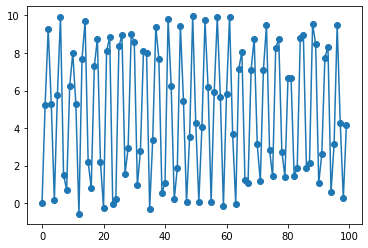

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_2, marker='o')

In [ ]:
X_2[missing] = np.NaN
soda.temperature = X_2

We'll only see the linear interpolation. but there are other type. Doing it with Pandas is, once again, fairly easy. You can use the *interpolate()* function in pandas to do that in one instruction. Let's do this one together.

But before that, try practicing and remove the missing values to see what the result of the regression would be without the missing value rows.

In [ ]:
soda2 = soda.dropna()
regr = lm.LinearRegression()
res = regr.fit(soda2.loc[:,["demand", "temperature"]], soda2.sales)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n" +
     "b_hat = " + str(res.coef_[1]))

Estimated coefficients are
a_hat = 7.991881399596189
b_hat = 4.977848582781937


Let's do this! [The documentation for the interpolation is under this link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html).

In [ ]:
temp = soda["temperature"]
soda3 = soda
soda3.temperature = temp.interpolate()
regr = lm.LinearRegression()
res = regr.fit(soda3.loc[:,["demand", "temperature"]], soda3.sales)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n" +
     "b_hat = " + str(res.coef_[1]))

Estimated coefficients are
a_hat = 7.71722527148194
b_hat = 4.745983247935701


# Outliers 

Missing values are not the only issue you'll face when using data. Outliers are an important topic.

## What is an outlier? 

The issue is there is no simple or even single definition. Intuitively , it is a value that should not have this value.

That's vague, but it is better to think of examples.

Some outliers can come from
* Measurement errors
* Data handling errors
* Abnormal situation during the observation (with a caveat)
* etc.

Many time, outliers are not too worrisome. However, things can become messy very fast. Consider the following example: We want to find a correlation between height (in meters) and weight (in kg) for people with a regular BMI (neither very over or underweight).

This relation is approximately linear (with an error). The issue is that, for some observation, the person in charge of collecting the data recorded the height in centimeters.

In [ ]:
# The following code will generate the example. 
#If you execute this notebook, please make sure you run this cell before trying to run the rest of the code
np.random.seed(11)
# We will build a simple linear model of weight as a function of the height. The issue is that the 7th observation was recorded in centimers
a = 40
height = 1.7 + np.random.normal(0, 0.15, 50)
weight = a* height + np.random.normal(0, 10, 50)
height[6] = height[6]*100
data = pd.DataFrame({"Height" : height, "Weight" : weight})
data['sex'] = "M"

In [ ]:
# Run the regression
Y = data.Weight
X = data.Height
X = np.asarray(X).reshape(-1,1)
regr = lm.LinearRegression()
res = regr.fit(X, Y)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n")

Estimated coefficients are
a_hat = 0.05439004528312434



That's pretty bad...

We can confirm the result we would have if we had the correct value.

In [ ]:
# Run the regression
Y = data.Weight
height2 = data.Height.copy()
height2[6] = height2[6]/100
X = height2
X = np.asarray(X).reshape(-1,1)
regr = lm.LinearRegression()
res = regr.fit(X, Y)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n")

Estimated coefficients are
a_hat = 44.267303220085516



Surely we can do something to avoid the problem? Well yes, but before we do, we need to be very confident that what we observe is indeed an error and, if possible, try to fix it. Alternatively, if we observe something that is so unusual that you don't believe it useful to consider it in your model, you may want to take it out or to "tune it down".

However, your model will be blind to that kind of occurence. Instead, you may want to use more advanced methods to consider this alternative method in your prediction (for example, you can use what is called Hidden Markov Models, that we will not see in this course).

## How to identify outliers?

Sometimes, you just don't have time to check each entry of the data to determine if it is an outlier. There are some techniques that allow you to narrow the scope of the search.

### The graphical one

Sometimes, you can look at the histogram of the features through a series of boxplot (remember the session about visualization?) to identify outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4a67a7c6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4a67a7cc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4a67a7c3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4a67a8f220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4a67a8f4f0>],
 'means': []}

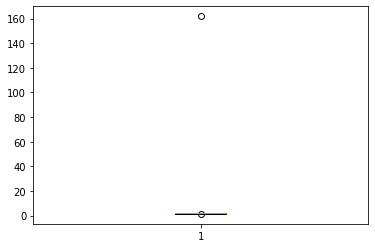

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(data.Height)

Clearly, we see that one of the value (the round at the top of the plot) is very different from the other (much higher than the 75-percentile).

The issue is that we don't know which one observation it is. And we need this info to treat it.

### Statistics-based methods

Only numeric columns can be considered for statistics-based methods.

In [ ]:
# Keep only columns that are numeric
data = data.select_dtypes(include=['number'])
data.head()

,Height,Weight
0,1.962418,84.497749
1,1.657089,73.239235
2,1.627315,75.969718
3,1.302002,57.418306
4,1.698757,71.902412


A first method could be to look at the different values of the column Height.

In [ ]:
# Divide the Height into Bins to spot more easily the outliers
data['Height'].value_counts().sort_index()

1.302002      1
1.447383      1
1.467971      1
1.504168      1
1.515148      1
1.522137      1
1.532079      1
1.540160      1
1.540755      1
1.567064      1
1.597483      1
1.603614      1
1.613907      1
1.627026      1
1.627315      1
1.628640      1
1.642920      1
1.652055      1
1.653564      1
1.657089      1
1.664412      1
1.669344      1
1.672134      1
1.673286      1
1.674137      1
1.695339      1
1.698757      1
1.709551      1
1.711024      1
1.713347      1
1.713776      1
1.717673      1
1.732602      1
1.744452      1
1.747310      1
1.763158      1
1.784179      1
1.794512      1
1.803452      1
1.808863      1
1.809841      1
1.810526      1
1.860134      1
1.864344      1
1.894343      1
1.910416      1
1.932361      1
1.936195      1
1.962418      1
161.950560    1
Name: Height, dtype: int64

A second method might be to look individually at the *n* maximum and minimum values (you'll have to select *n*). This is fairly easy to do with pandas and numpy. Just use *argpartition()*, a function that retrieve the index of minimums (but with negative arguments, you can retrieve the maximums).

In [ ]:
arr = np.asarray(data.Height)
ind_max = np.argpartition(arr, -3)[-3:] # We select the 3 largest values
print("Indices: " + str(ind_max) + "\n")
print("Values: " + str(arr[ind_max]) + "\n")

Indices: [17  6  0]

Values: [  1.93619511 161.95055957   1.96241821]



In [ ]:
arr = np.asarray(data.Height)
ind_min = np.argpartition(arr, 3)[:3] # We select the 3 smallest values
print("Indices: " + str(ind_min) + "\n")
print("Values: " + str(arr[ind_min]) + "\n")

Indices: [38  3 48]

Values: [1.46797061 1.30200222 1.44738337]



But this is unsatisfactory: you still have to do a lot of manual work: If all the values you find are outliers, you need to check if the next one is an outlier too.

You can use a more "automatic" way. However, it is predicated on strong assumption on your features: namely that they are distributed normally.

The idea here is to compute the mean and standard deviation of the sample and to analyze everything that falls outside $[\bar{x} - 2 \hat{\sigma}; \bar{x} + 2 \hat{\sigma}]$. Note, however, that both $\bar{x}$ and $\hat{\sigma}$

In [ ]:
x_bar = np.mean(data.Height)
sigma_hat = np.std(data.Height)

In [ ]:
outlier = (data.Height < x_bar - 2 * sigma_hat) | (data.Height > x_bar + 2 * sigma_hat)

In [ ]:
data.loc[outlier]

,Height,Weight
6,161.95056,76.87124


As you can see, in this case, the procedure identified the outlier only, but be weary of the skew that outliers can induce on the mean and observed standard deviation lest you'll lose some good quality data.

We can define a function so that we can more easily reuse the code created. 

In [ ]:
# Define a function to find outliers in a numeric column of a data frame
def find_outliers(df, col, print_outputs = True):
    x_bar = np.mean(df[col])
    sigma_hat = np.std(df[col])
    outlier = (df[col] < x_bar - 2 * sigma_hat) | (df[col] > x_bar + 2 * sigma_hat)

    if print_outputs:
        if outlier.sum() > 0:
            print(f'For column {col} we have {outlier.sum()} outliers: \n{df[outlier][col]}')
    else:
        return outlier

In [ ]:
find_outliers(data, 'Height')

For column Height we have 1 outliers: 
6    161.95056
Name: Height, dtype: float64


## How to treat the outliers?

Once again, there is not one single solution: you'll probably have to experiment. There are two main class of ways to deal with outliers:
* delete them
* bring them to values that are not outliers

The first way is radical in some ways and may not be practical if your dataset is small or if you have many features (why throw away many useful value because one field is corrupted?).

We can negate the output of the procédure we've done at the last step: *~outlier* will have the value true for any non-outlier and false for the outlier. You can then take the indexed dataset to keep only the non-outliers.

In [ ]:
non_outliers = ~outlier
print("Before dropping the outliers, the dataset has " + str(len(data)) + " rows.")
new_data = data.loc[non_outliers].copy()
print("After dropping outliers, there remains " + str(len(new_data)) + " rows.")

Before dropping the outliers, the dataset has 50 rows.
After dropping outliers, there remains 49 rows.


Good!

We could also decide to bring the rows outside the two "bands" defined by $\bar{x} - 2 \hat{\sigma}$ and $\bar{x} + 2 \hat{\sigma}$ by setting values outside thoses limits to those limits. This is done relatively easily as such:

In [ ]:
min_band = np.mean(data.Height) - 2 * np.std(data.Height)
max_band = np.mean(data.Height) + 2 * np.std(data.Height)
data.loc[data.Height < min_band, "Height"] = min_band
data.loc[data.Height > max_band, "Height"] = max_band

In [ ]:
data.loc[6]

Height    49.767616
Weight    76.871240
Name: 6, dtype: float64

As you can see, this is not ideal: the person we registered as being 160 m tall is now "only" 49 m. It improved the matter, but still...

To solve this issue, you could, for example, set the value of the values outside the band to the higher (or smaller) value inside the band. This can be done by combining the two approaches above and left as an exercise (basically: drop the outliers, take the maximum and the minimum values of the feature, store there somewhere and then assign them to the rows outside the bands instead of assigning min_band and max_band).

# Duplicates 

The topic of duplicate is somewhat easier to manage.

The question is why do you have duplicates in your data? Are they legitimate?

Everything depends on how you, or the person who retrieved the data, worked: Remember the class on SQL? Well, if your dataset has a primary key or something like it, you may be confident that duplicates are not wanted and you may get rid of them promptly.

On the other hand, if you're not too sure whether or not the duplicates ought to be there, you can always perform sensitivity analysis: Once you decide whether or not to keep it, do your analysis. Once it's done, apply the same pipeline on the data by adding or substracting the data (depending on what you had chosen). If the conclusions or performance of the models remain the same, no issue. If not, you really need to dig deeper to understand whether or not duplicates are legitimate.

## How to get rid of duplicates? 

The good news is that getting rid of duplicates is easy! You can use pandas' *drop_duplicates* function and be done with it. Let's work a little example.

In [ ]:
import numpy as np
import pandas as pd
# The following code will generate the example. 
#If you execute this notebook, please make sure you run this cell before trying to run the rest of the code
np.random.seed(11)
# We will build a simple linear model of weight as a function of the height. The issue is that the 7th observation was recorded in centimers
a = 40
height = 1.7 + np.random.normal(0, 0.15, 500)
errors = np.random.normal(0, 10, 500)
weight = a* height + errors
data = pd.DataFrame({"Height" : height, "Weight" : weight})
# Because it was in two databases, the data regarding obese people (the ones for which the error is the highest) 
# was imported twice:
heavy = data.loc[errors >= np.quantile(errors, 0.75)]
data = data.append(heavy)

In [ ]:
Y = data.Weight
X = data.Height
X = np.asarray(X).reshape(-1,1)
regr = lm.LinearRegression()
res = regr.fit(X, Y)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n")

Estimated coefficients are
a_hat = 39.48277167835145



We can drop the duplicates and run it again. We can do this in SQL or in pandas:

First SQL: (you will be using pandasql for assignement 1)

In [ ]:
!pip install -U pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandasql import sqldf
pysql = lambda q: sqldf(q, globals()) # define function to execute sql on dataframe

In [ ]:
datasql = pysql(''' select distinct Height, Weight
              from data
              ''') # execute your SQL query, it'll return a pandas dataframe

In [ ]:
Y = datasql.Weight
X = datasql.Height
X = np.asarray(X).reshape(-1,1)
regr = lm.LinearRegression()
res = regr.fit(X, Y)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n")

Estimated coefficients are
a_hat = 39.73625342602388



Or with pandas

In [ ]:
data = data.drop_duplicates()

In [ ]:
Y = data.Weight
X = data.Height
X = np.asarray(X).reshape(-1,1)
regr = lm.LinearRegression()
res = regr.fit(X, Y)
print("Estimated coefficients are\n" + 
      "a_hat = " + str(res.coef_[0]) + "\n")

Estimated coefficients are
a_hat = 39.73625342602388



The gain is small because of the structure of the dataset and the error, but, with particularly noisy datasets and on certain algorithms (that we will see in the next lectures), the impact may be much larger.

# Formatting for analysis

The last topic for today is the broader topic of formats. Different types of algorithms and different problems require different data format. For example, classification problems usually require the target to be a factor or a string. For time seriers, there are specific date formats that must be assigned to the data in order to work.

## "Casting" of a column

In programming, the action of constraining data from one type to another is usually referred to as "casting". For example, it is easy to cast an integer, for example *12* into a string, in this case "12". Working the other way around is more tricky.

In pandas (and with numpy series in general), you can cast by using the method *astype(t)* where *t* is a string representing the type of data you want to convert the series to.

Imagine you have a column in your dataframe representing whether the person loves hamburger or not. It is currently coded as an integer: 1 means the person likes hamburgers and 0 means she doesn't.

In [ ]:
loves_hamburgers = pd.DataFrame(np.random.binomial(1, 0.8, 100), columns=["loves_burgers"])
loves_hamburgers

,loves_burgers
0,1
1,0
2,1
3,1
4,1
...,...
95,1
96,1
97,0
98,1


Say we are looking to use an algorithms from a package and, upon reading the docs, we realize that the target column must be coded as a boolean (a True or False value). What to do then?

Easy, just use the *astype(t)* function mentioned before with the type *t* set to 'b' (which stands for boolean).

In [ ]:
loves_hamburgers.loves_burgers = loves_hamburgers.loves_burgers.astype('bool')
loves_hamburgers

,loves_burgers
0,True
1,False
2,True
3,True
4,True
...,...
95,True
96,True
97,False
98,True


## Working with time series

Another issue is when time is involved. In this case, you can use the *to_datetime()* function to make sure that the series is casted to a date and hours (up to the nanosecond if this info is available in the original data).

Some considerations to have with the dates and times:
* While the function is "smart" enough to recognize most time format from a string, it may be necessary to help it by specifying the "format" argument to indicate where in the string are the day and month.
* In the original dataset, you'll often have the date formated either as a string or as a integer. The integer usually indicate the number of seconds that have passed since the 1st of January 1970 (known as the UNIX epoch). If you see it in your data, it is not a mistake, just an alternative way to store time.

Let's try this: we'll generate a bunch of dates and try to cast them into real datetime data.

In [ ]:
days = np.random.randint(1, 28+1, 100)
months = np.random.randint(1, 12+1, 100)
years = np.random.randint(2000, 2021, 100)
strings = np.array([str(days[ii])+"/"+str(months[ii])+"/"+str(years[ii]) for ii in range(0,100)])

In [ ]:
strings

array(['12/10/2013', '12/4/2016', '4/6/2009', '4/4/2015', '3/10/2012',
       '16/9/2014', '20/3/2001', '19/1/2015', '13/7/2013', '3/3/2002',
       '25/7/2015', '5/10/2014', '22/9/2005', '27/9/2013', '16/8/2018',
       '12/9/2006', '23/12/2005', '16/4/2000', '17/8/2018', '26/2/2007',
       '24/1/2005', '4/2/2014', '13/4/2017', '1/8/2003', '22/10/2006',
       '20/4/2006', '27/6/2019', '28/3/2005', '3/5/2020', '26/11/2008',
       '3/8/2009', '16/12/2015', '20/2/2005', '6/9/2014', '24/8/2014',
       '22/4/2006', '5/3/2004', '9/12/2017', '16/10/2003', '13/9/2017',
       '6/4/2010', '22/11/2005', '8/2/2005', '15/8/2013', '27/7/2005',
       '28/1/2004', '1/12/2014', '27/7/2016', '26/6/2006', '17/12/2020',
       '7/8/2005', '28/8/2007', '22/10/2016', '5/8/2017', '15/6/2008',
       '3/9/2017', '14/6/2019', '13/9/2008', '8/4/2016', '2/4/2009',
       '7/12/2020', '27/3/2018', '14/5/2001', '8/4/2007', '27/5/2003',
       '1/1/2016', '18/8/2004', '3/2/2003', '23/3/2019', '27/10/2015',
 

In [ ]:
data_dates = pd.DataFrame()
data_dates["dates"] = pd.to_datetime(strings)

In [ ]:
data_dates

,dates
0,2013-12-10
1,2016-12-04
2,2009-04-06
3,2015-04-04
4,2012-03-10
...,...
95,2008-05-19
96,2002-05-11
97,2014-05-16
98,2000-06-15


But wait! There's an issue: for days smaller than 12, the function erroneously assumes that it is the month. To go around it, just specify that, when in doubt, the day comes first.

In [ ]:
data_dates.dates = pd.to_datetime(strings, dayfirst= True)
data_dates

,dates
0,2013-10-12
1,2016-04-12
2,2009-06-04
3,2015-04-04
4,2012-10-03
...,...
95,2008-05-19
96,2002-11-05
97,2014-05-16
98,2000-06-15


Sometimes, it is important to retrieve information that derives from the date. For example, it is sometimes important to know which day of the week it was (imagine building a model where we forecast attendance to an amusement park, it is more likely that it will be high on the weekends).

More generally, you may want to break a date into its components. If you want to do so, you can use the following functions:

In [ ]:
data_dates['WeekDay'] = data_dates.dates.dt.day_name()
data_dates['WeekDayNum'] = data_dates.dates.dt.dayofweek
data_dates['Day'] = data_dates.dates.dt.day
data_dates['Month'] = data_dates.dates.dt.month
data_dates['Year'] = data_dates.dates.dt.year
data_dates['Hour'] = data_dates.dates.dt.hour

In [ ]:
data_dates

,dates,WeekDay,WeekDayNum,Day,Month,Year,Hour
0,2013-10-12,Saturday,5,12,10,2013,0
1,2016-04-12,Tuesday,1,12,4,2016,0
2,2009-06-04,Thursday,3,4,6,2009,0
3,2015-04-04,Saturday,5,4,4,2015,0
4,2012-10-03,Wednesday,2,3,10,2012,0
...,...,...,...,...,...,...,...
95,2008-05-19,Monday,0,19,5,2008,0
96,2002-11-05,Tuesday,1,5,11,2002,0
97,2014-05-16,Friday,4,16,5,2014,0
98,2000-06-15,Thursday,3,15,6,2000,0


Sometimes you also have a bit more specific formats, such as for instance only the month and the year, separated with an forward slash as in the example below:

In [ ]:
all_months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
months = np.random.choice(all_months, 100)
years = np.random.randint(2000, 2021, 100)
strings = np.array([str(months[ii])+'/'+str(years[ii]) for ii in range(0,100)])
strings

array(['JUN/2008', 'APR/2020', 'MAY/2012', 'AUG/2006', 'OCT/2002',
       'JUN/2019', 'DEC/2018', 'AUG/2014', 'OCT/2000', 'AUG/2011',
       'MAY/2019', 'NOV/2010', 'JAN/2003', 'JUL/2011', 'DEC/2007',
       'OCT/2014', 'SEP/2016', 'SEP/2018', 'OCT/2008', 'JUL/2008',
       'MAR/2001', 'JUL/2007', 'MAY/2002', 'AUG/2013', 'FEB/2007',
       'NOV/2020', 'JAN/2019', 'FEB/2007', 'APR/2003', 'MAY/2005',
       'JUN/2002', 'MAR/2010', 'MAR/2006', 'MAR/2010', 'JUL/2006',
       'JUL/2003', 'SEP/2003', 'JUL/2019', 'DEC/2004', 'JUN/2014',
       'MAY/2011', 'AUG/2006', 'DEC/2003', 'OCT/2004', 'JUL/2012',
       'MAR/2013', 'APR/2003', 'JUL/2009', 'AUG/2016', 'APR/2008',
       'MAR/2004', 'APR/2003', 'SEP/2019', 'MAY/2005', 'MAR/2001',
       'JUL/2018', 'OCT/2019', 'FEB/2009', 'MAR/2002', 'DEC/2010',
       'JAN/2020', 'FEB/2008', 'OCT/2011', 'SEP/2020', 'JAN/2002',
       'JUN/2001', 'NOV/2002', 'OCT/2004', 'JUN/2015', 'MAR/2008',
       'JUL/2016', 'NOV/2002', 'OCT/2012', 'SEP/2016', 'APR/20

In those cases you can also specify the format of the dates, you can have a view [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) on what are the format specifications.

In [ ]:
data_dates.dates = pd.to_datetime(strings, format='%b/%Y')
data_dates

,dates,WeekDay,WeekDayNum,Day,Month,Year,Hour
0,2008-06-01,Saturday,5,12,10,2013,0
1,2020-04-01,Tuesday,1,12,4,2016,0
2,2012-05-01,Thursday,3,4,6,2009,0
3,2006-08-01,Saturday,5,4,4,2015,0
4,2002-10-01,Wednesday,2,3,10,2012,0
...,...,...,...,...,...,...,...
95,2018-11-01,Monday,0,19,5,2008,0
96,2008-08-01,Tuesday,1,5,11,2002,0
97,2017-08-01,Friday,4,16,5,2014,0
98,2020-11-01,Thursday,3,15,6,2000,0


# Your turn 

Your friend with whom you're working on an assignment where you try to use data about age, wealth and whether or not the person drives an expensive car to predict the number of ties the person possess, sent you the dirty dataset present in the file "dirty_set.csv". Clean it up and estimate the coefficient of the linear regression.

For the NaN's, substitute them with the mean of their series for continuous variable and the mode of the series for the categorical or boolean ones.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [8]:
df = pd.read_csv("/gdrive/MyDrive/ULB/TP STATS406/2023/STATS406 TP5 - dirty_set.csv", sep=';')
df

,Unnamed: 0,nb_ties,date_of_birth,wealth,owns_expensive_car
0,0,9,26/5/1988,"666,0394357",0.0
1,1,15,17/3/1968,"1295,638098",0.0
2,2,23,28/3/1951,"1581,272491",1.0
3,3,15,18/12/1980,NaN,1.0
4,4,11,24/9/1988,"1316,135867",0.0
...,...,...,...,...,...
95,95,19,12/12/1954,"1467,482255",0.0
96,96,15,02/03/1973,"637,837149",1.0
97,97,13,09/09/1981,"1255,387645",0.0
98,98,20,20/2/1963,"1414,991319",1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          100 non-null    int64  
 1   nb_ties             100 non-null    int64  
 2   date_of_birth       100 non-null    object 
 3   wealth              89 non-null     object 
 4   owns_expensive_car  96 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB


In [10]:
# delete unused index column
del df['Unnamed: 0']

In [15]:
# convert wealth column to numeric and replace commas by dots so that python recognises it is a number
df['wealth'] = pd.to_numeric(df['wealth'].str.replace(',', '.'))

In [16]:
# your cleaning code comes here
mean_wealth = np.mean(df.wealth) # compute mean
stdev_wealth = np.std(df.wealth) # compute stdev
df.loc[df.wealth > mean_wealth + 2 * stdev_wealth, "wealth"]

26    1.139735e+06
90    3.685299e+05
Name: wealth, dtype: float64

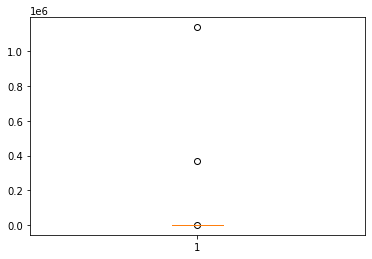

In [19]:
plt.boxplot(df.wealth[~df.wealth.isna()]);

In [20]:
df.loc[df.wealth > mean_wealth + 2 * stdev_wealth, "wealth"] = mean_wealth + 2 * stdev_wealth  # cap outliers with mean + 2* stdev

In [21]:
# check missing values
df.owns_expensive_car.isna().sum()

4

In [22]:
df.wealth.isna().sum()

11

In [23]:
# replace missing values
mean_wealth = np.mean(df.wealth)
mode_owns = sp.stats.mode(df.owns_expensive_car)[0][0] # compute mode 
df.wealth = df.wealth.fillna(mean_wealth) # replace missing values with 'capped' mean
df.owns_expensive_car = df.owns_expensive_car.fillna(mode_owns) # replace by mode


<ipython-input-23-531847463f1d>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_owns = sp.stats.mode(df.owns_expensive_car)[0][0] # compute mode


In [24]:
df.date_of_birth = pd.to_datetime(df.date_of_birth, dayfirst = True) # cast to date

In [25]:
df

,nb_ties,date_of_birth,wealth,owns_expensive_car
0,9,1988-05-26,666.039436,0.0
1,15,1968-03-17,1295.638098,0.0
2,23,1951-03-28,1581.272491,1.0
3,15,1980-12-18,7103.198512,1.0
4,11,1988-09-24,1316.135867,0.0
...,...,...,...,...
95,19,1954-12-12,1467.482255,0.0
96,15,1973-03-02,637.837149,1.0
97,13,1981-09-09,1255.387645,0.0
98,20,1963-02-20,1414.991319,1.0


In [26]:
from datetime import date
ages_in_ns = (date.today() - df.date_of_birth.dt.date) # make sure that the formatted column for the date of birth is called "date_of_birth"
tot_sec_year = 60 * 60 * 24 * 365
years = [ (ii.total_seconds()/tot_sec_year) for ii in ages_in_ns]
df["age"] = years
regr = lm.LinearRegression()
res = regr.fit(df.loc[:,["wealth", "age", "owns_expensive_car"]], df.nb_ties)
print("Estimated coefficients are\n" + 
      "w_hat = " + str(res.coef_[0]) + "\n" +
     "a_hat = " + str(res.coef_[1]) + "\n" +
     "o_hat = " + str(res.coef_[2]))

Estimated coefficients are
w_hat = -5.014624313866021e-06
a_hat = 0.202339681989737
o_hat = 3.545317106521008


In [ ]:
#true values
w = 0.004
a= 0.2
o = 3